<a href="https://colab.research.google.com/github/ArthurMarchiDS/Portfolio/blob/master/Panorama_do_COVID_19_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19.

Vamos fazer uma abordagem de como estão os dados referentes à pandemia.

Mesmo com a vacinação muitos países ainda estão tendo aumento do números de casos.

O objetivo é analisar a situação do Covid-19 após 2 anos de pandemia, irei realizar uma análise sobre os dados públicos da doença.


## Obtenção dos Dados
 Os dados foram obtidos através do repositório explicado abaixo, o Dataset possui informações de várias fontes diferentes.

O repositório é atualizado diariamente e mantido pelo [Our World In Data](https://ourworldindata.org/coronavirus).

### Importando os dados do COVID-19

* Os dados foram obtidos no repositório [https://github.com/owid/covid-19-data/tree/master/public/data](https://github.com/owid/covid-19-data/tree/master/public/data)
.

In [23]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# importar o dataset COVID-19 para um DataFrame
df = pd.read_csv('owid-covid-data.csv')

## Análise Exploratória dos Dados

A presente análise tem como objetivo analisar a situação do Covid-19 após 2 anos de pandemia, e verificar os números de contaminados e o número de mortes, bem como sua evolução até hoje.



##Conhecendo a base de dados: 

In [3]:
df.head() #Mostra as primeiras 5 linhas do Dataframe

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
df.shape # Mostra a quantidades de linhas x colunas

(22107, 67)

In [6]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [7]:
df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [71]:
#quantidade de dados ausentes

df.isnull().sum().sort_values(ascending = False)



weekly_icu_admissions_per_million          22107
weekly_icu_admissions                      22107
excess_mortality_cumulative_per_million    21558
excess_mortality                           21558
excess_mortality_cumulative                21558
                                           ...  
total_cases                                  103
population                                     0
date                                           0
location                                       0
iso_code                                       0
Length: 67, dtype: int64

In [13]:
#Convertendo a coluna Date
df.date = pd.to_datetime(df.date)

In [47]:
#Aqui podemos ver que o último registro do Dataset consta a data de 23-03-2022

df.date.max()

Timestamp('2022-03-23 00:00:00')

In [48]:
df.loc[df.date == '2022-03-23'].sort_values(by='total_cases', ascending = False)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
9123,OWID_ASI,NaN,Asia,2022-03-23,135187006.0,671954.0,765187.000,1393706.0,1627.0,1523.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1528,OWID_AFR,NaN,Africa,2022-03-23,11474111.0,942.0,4782.429,251444.0,42.0,63.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6810,ARG,South America,Argentina,2022-03-23,9019660.0,3603.0,4832.000,127752.0,77.0,59.714,...,16.2,27.7,NaN,5.00,76.67,0.845,NaN,NaN,NaN,NaN
9911,AUS,Oceania,Australia,2022-03-23,4113691.0,59704.0,50075.000,5817.0,31.0,22.143,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN
15936,BEL,Europe,Belgium,2022-03-23,3757776.0,16162.0,10570.286,30635.0,30.0,20.429,...,25.1,31.4,NaN,5.64,81.63,0.931,NaN,NaN,NaN,NaN
10669,AUT,Europe,Austria,2022-03-23,3585486.0,53071.0,43090.143,15530.0,43.0,34.429,...,28.4,30.9,NaN,7.37,81.54,0.922,NaN,NaN,NaN,NaN
13665,BGD,Asia,Bangladesh,2022-03-23,1950980.0,134.0,122.286,29118.0,1.0,0.857,...,1.0,44.7,34.808,0.80,72.59,0.632,NaN,NaN,NaN,NaN
15157,BLR,Europe,Belarus,2022-03-23,953901.0,1647.0,1288.000,6747.0,10.0,8.429,...,10.5,46.1,NaN,11.00,74.79,0.823,NaN,NaN,NaN,NaN
19631,BOL,South America,Bolivia,2022-03-23,900260.0,261.0,256.571,21483.0,0.0,1.000,...,NaN,NaN,25.383,1.10,71.51,0.718,NaN,NaN,NaN,NaN
11422,AZE,Asia,Azerbaijan,2022-03-23,791583.0,38.0,72.286,9670.0,4.0,5.286,...,0.3,42.5,83.241,4.70,73.00,0.756,NaN,NaN,NaN,NaN


##Podemos ver que os países com mais casos de Covid no dia 23/03/2022 são:

* Argentina	com	9.019.660 casos

* Austrália com 4.113.691 casos

* Bélgica com 3.757.776 casos

Agora vamos verificar os casos de morte:

In [52]:
df.loc[df.date == '2022-03-23'].sort_values(by='total_deaths', ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
9123,OWID_ASI,NaN,Asia,2022-03-23,135187006.0,671954.0,765187.000,1393706.0,1627.0,1523.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1528,OWID_AFR,NaN,Africa,2022-03-23,11474111.0,942.0,4782.429,251444.0,42.0,63.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6810,ARG,South America,Argentina,2022-03-23,9019660.0,3603.0,4832.000,127752.0,77.0,59.714,...,16.2,27.7,NaN,5.00,76.67,0.845,NaN,NaN,NaN,NaN
15936,BEL,Europe,Belgium,2022-03-23,3757776.0,16162.0,10570.286,30635.0,30.0,20.429,...,25.1,31.4,NaN,5.64,81.63,0.931,NaN,NaN,NaN,NaN
13665,BGD,Asia,Bangladesh,2022-03-23,1950980.0,134.0,122.286,29118.0,1.0,0.857,...,1.0,44.7,34.808,0.80,72.59,0.632,NaN,NaN,NaN,NaN
19631,BOL,South America,Bolivia,2022-03-23,900260.0,261.0,256.571,21483.0,0.0,1.000,...,NaN,NaN,25.383,1.10,71.51,0.718,NaN,NaN,NaN,NaN
21101,BIH,Europe,Bosnia and Herzegovina,2022-03-23,374573.0,147.0,129.000,15691.0,6.0,5.714,...,30.2,47.7,97.164,3.50,77.40,0.780,NaN,NaN,NaN,NaN
10669,AUT,Europe,Austria,2022-03-23,3585486.0,53071.0,43090.143,15530.0,43.0,34.429,...,28.4,30.9,NaN,7.37,81.54,0.922,NaN,NaN,NaN,NaN
11422,AZE,Asia,Azerbaijan,2022-03-23,791583.0,38.0,72.286,9670.0,4.0,5.286,...,0.3,42.5,83.241,4.70,73.00,0.756,NaN,NaN,NaN,NaN
7590,ARM,Asia,Armenia,2022-03-23,422382.0,28.0,32.429,8603.0,2.0,2.286,...,1.5,52.1,94.043,4.20,75.09,0.776,NaN,NaN,NaN,NaN


##Podemos ver que os países com mais mortes no dia 23-03-2022 são:

* Argentina com 127.752 mortes
* Bélgica com 30.635 mortes
* Bangladesh com 29.118 mortes

Para efeitos de comparação, vamos verificar os 5 países com as menores incidências de morte causadas por Covid-19, são eles:

In [53]:
df.loc[df.date == '2022-03-23'].sort_values(by='total_deaths', ascending=True)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
18888,BTN,Asia,Bhutan,2022-03-23,23155.0,530.0,434.143,9.0,0.0,0.286,...,NaN,NaN,79.807,1.70,71.78,0.654,NaN,NaN,NaN,NaN
5256,AIA,North America,Anguilla,2022-03-23,2633.0,0.0,5.429,9.0,0.0,0.000,...,NaN,NaN,NaN,NaN,81.88,NaN,NaN,NaN,NaN,NaN
20352,BES,North America,Bonaire Sint Eustatius and Saba,2022-03-23,8039.0,NaN,NaN,31.0,0.0,0.000,...,NaN,NaN,NaN,NaN,77.79,NaN,NaN,NaN,NaN,NaN
18140,BMU,North America,Bermuda,2022-03-23,12231.0,NaN,NaN,126.0,0.0,0.143,...,NaN,NaN,NaN,NaN,82.59,NaN,NaN,NaN,NaN,NaN
5997,ATG,North America,Antigua and Barbuda,2022-03-23,7482.0,9.0,1.714,135.0,0.0,0.000,...,NaN,NaN,NaN,3.80,77.02,0.778,NaN,NaN,NaN,NaN
3796,AND,Europe,Andorra,2022-03-23,39713.0,479.0,131.286,153.0,0.0,0.143,...,29.0,37.8,NaN,NaN,83.73,0.868,NaN,NaN,NaN,NaN
17405,BEN,Africa,Benin,2022-03-23,26952.0,0.0,0.000,163.0,0.0,0.000,...,0.6,12.3,11.035,0.50,61.77,0.545,NaN,NaN,NaN,NaN
8331,ABW,North America,Aruba,2022-03-23,33843.0,0.0,3.714,212.0,0.0,0.000,...,NaN,NaN,NaN,NaN,76.29,NaN,NaN,NaN,NaN,NaN
14402,BRB,North America,Barbados,2022-03-23,58018.0,115.0,95.714,329.0,0.0,0.429,...,1.9,14.5,88.469,5.80,79.19,0.814,NaN,NaN,NaN,NaN
16667,BLZ,North America,Belize,2022-03-23,57203.0,12.0,12.857,654.0,0.0,0.286,...,NaN,NaN,90.083,1.30,74.62,0.716,NaN,NaN,NaN,NaN


Os países com as menores incidências de morte causadas por Covid-19 no dia 23-03-2022 são:

* Butão com 9 mortes
* Anguilla com 9  mortes
* Países Baixos Caribenhos com 31 mortes
* Bermudas com 126 mortes
* Antígua e Barbuda com 135 mortes

##Argentina

Diante dos insights obtidos até aqui vimos que a Argentina, aparece na lista com mais casos de Covid-19 mas também consta na lista com mais mortes, vamos analisar essas informações em um gráfico para facilitar nosso entendimento.

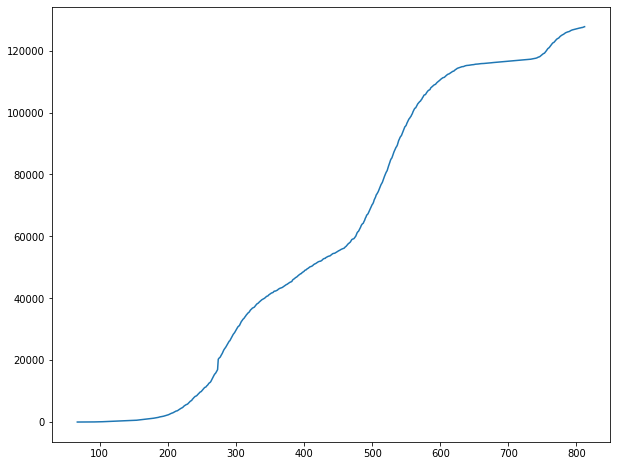

In [92]:
# gráfico de linha para mortes na Argentina
df.loc[df.location == "Argentina", "total_deaths"].reset_index(drop=True).plot(figsize=(10,8));

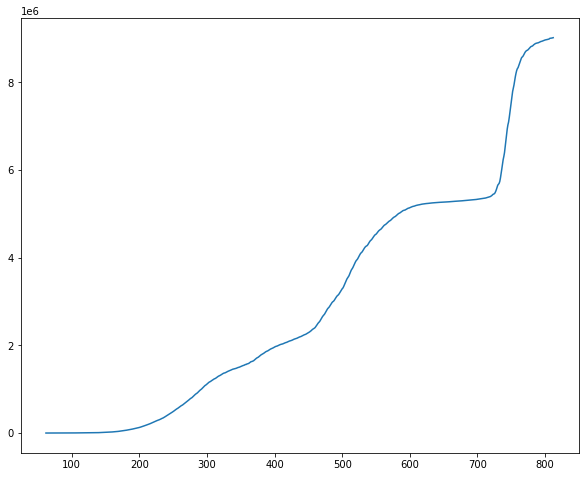

In [98]:
#gráfico de linhas para casos na Argentina
df.loc[df.location == "Argentina", "total_cases"].reset_index(drop=True).plot(figsize=(10,8));

## Conclusão

A presente análise se iniciou com o objetivo de analisar os dados do Covid-19 após 2 anos de pandemia.

Iniciando a análise podemos ver que ainda existem países com uma taxa muito elevada de casos tais como Argentina e até países desenvolvidos e com uma taxa de vacinação bastante alta como Austrália e até um país europeu consta na lista como a Bélgica.

Argentina e Bélgica aparecem no Top 3 de países com mais casos e com mais mortes.

Mas também podemos ver que existem países que estão com as taxas de mortes muito baixas tais como Butão e Anguilla com 9 mortes cada um.